<a href="https://colab.research.google.com/github/trongr/ai/blob/master/fastai/bear_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 2.7MB/s 
     |████████████████████████████████| 1.1MB 9.3MB/s 
     |████████████████████████████████| 194kB 17.6MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
     |████████████████████████████████| 40kB 5.8MB/s 
     |████████████████████████████████| 92kB 9.3MB/s 
     |████████████████████████████████| 61kB 7.9MB/s 
     |████████████████████████████████| 51kB 7.6MB/s 
     |████████████████████████████████| 2.6MB 18.3MB/s 
Mounted at /content/gdrive


In [ ]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
import fastai
fastai.__version__

'2.1.4'

In [ ]:
from google.colab import files
files.upload()

Saving polar.csv to polar.csv
Saving black.csv to black.csv
Saving grizzly.csv to grizzly.csv


{'black.csv': b' https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSLgk6y8pkYQbdJ5fYEiSGsT_mNTutro-RZ2Mjk7RdFATV4VQ84&usqp=CAU\nhttps://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTE0Bj5GtvdXj-5uPQ09LYapef8oTKeAy52siPIsc80aS6uYLi6&usqp=CAU\nhttps://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSvhrKKkVXEwS1CNtPlePc3CmHMqSYbzpgDFFmblCzVXn3rwOjh&usqp=CAU\nhttps://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSGc--bEsx0PyHheRjpSuv5l9qTa-ZJIue-1vrPbTrD3OCipY4Y&usqp=CAU\nhttps://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcS1037Wv9t2wc0YReVlgbiCKavP2h9cpnRH7Cn7ONKuUVILtWlY&usqp=CAU\nhttps://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRu2XIzkKWD7wQ0NyHjpbjIFkKE639DihedUCps0MRXjyDYPCz7&usqp=CAU\nhttps://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSXkdg-i8P_HkSjthwRktIZpfYTmsyn9BGqOCrC5AUDFHaY29MS&usqp=CAU\nhttps://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRtD4Yu2PdTnpyCWtgUEW-cXQly-gvHulXV7SojonODYDRpzqH4&usqp=CAU\nhttps://encrypted-tbn0.gstatic.com/images?q=tbn

In [ ]:
path = Path('bears')

In [ ]:
!mkdir -p bears/{grizzly,polar,black}
!cd bears/grizzly/ && xargs -n 1 curl -O < ../../grizzly.csv
!cd bears/black/ && xargs -n 1 curl -O < ../../black.csv
!cd bears/polar/ && xargs -n 1 curl -O < ../../polar.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2657  100  2657    0     0   108k      0 --:--:-- --:--:-- --:--:--  108k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2264  100  2264    0     0   110k      0 --:--:-- --:--:-- --:--:--  110k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2063  100  2063    0     0  27506      0 --:--:-- --:--:-- --:--:-- 27506
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2420  100  2420    0     0   124k      0 --:--:-- --:--:-- --:--:--  131k
  % Total    % Received % Xferd  Average Speed   Tim

In [7]:
%%bash

function renameFiles {
  a=1
  for i in *; do
    new=$(printf "%04d.jpg" "$a")
    mv -i -- "$i" "$new"
    let a=a+1
  done
}

cd bears/grizzly && renameFiles
cd ../black && renameFiles
cd ../polar && renameFiles

In [8]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))


In [9]:
dls = bears.dataloaders(path)

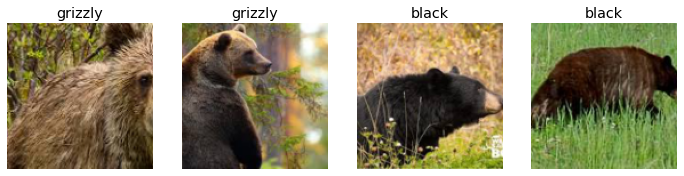

In [10]:
dls.valid.show_batch(max_n=4, nrows=1)

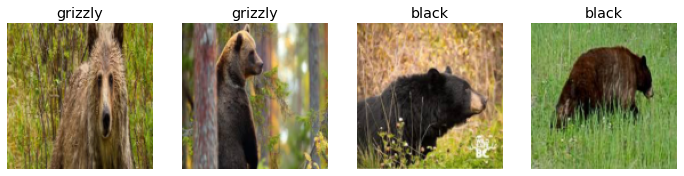

In [11]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

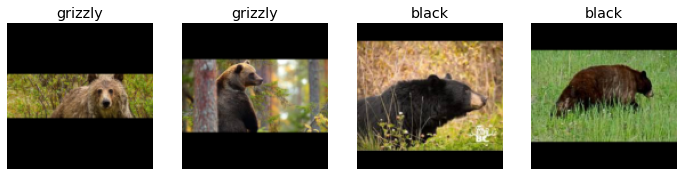

In [12]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

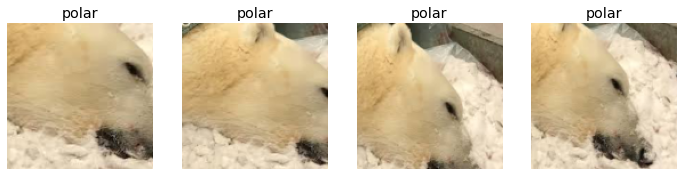

In [13]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

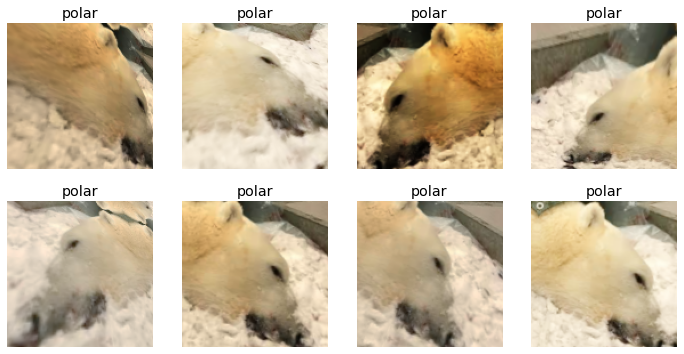

In [14]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [15]:
bears = bears.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [16]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.071075,0.659057,0.148649,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.469568,0.622835,0.128378,00:02
1,0.405398,0.684287,0.135135,00:02
2,0.325059,0.682817,0.141892,00:02
3,0.274488,0.671897,0.135135,00:02


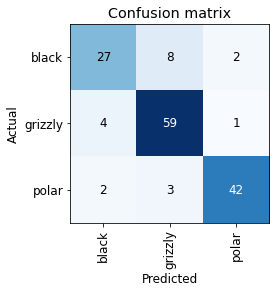

In [17]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

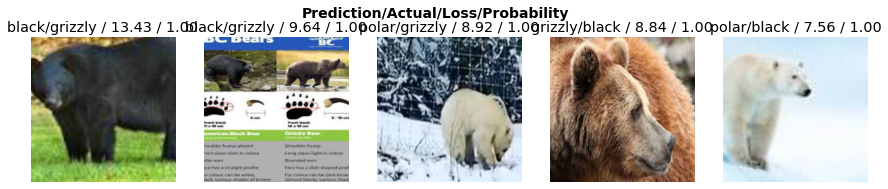

In [18]:
interp.plot_top_losses(5, nrows=1)

In [19]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [20]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# Can't use this if the folders have images that have the same name, e.g. bears/black/0015.jpg and bears/grizzly/0015.jpg
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [21]:
learn.export()

In [22]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [23]:
learn_inf = load_learner(path/'export.pkl')

Saving polarbears.jpg to polarbears.jpg


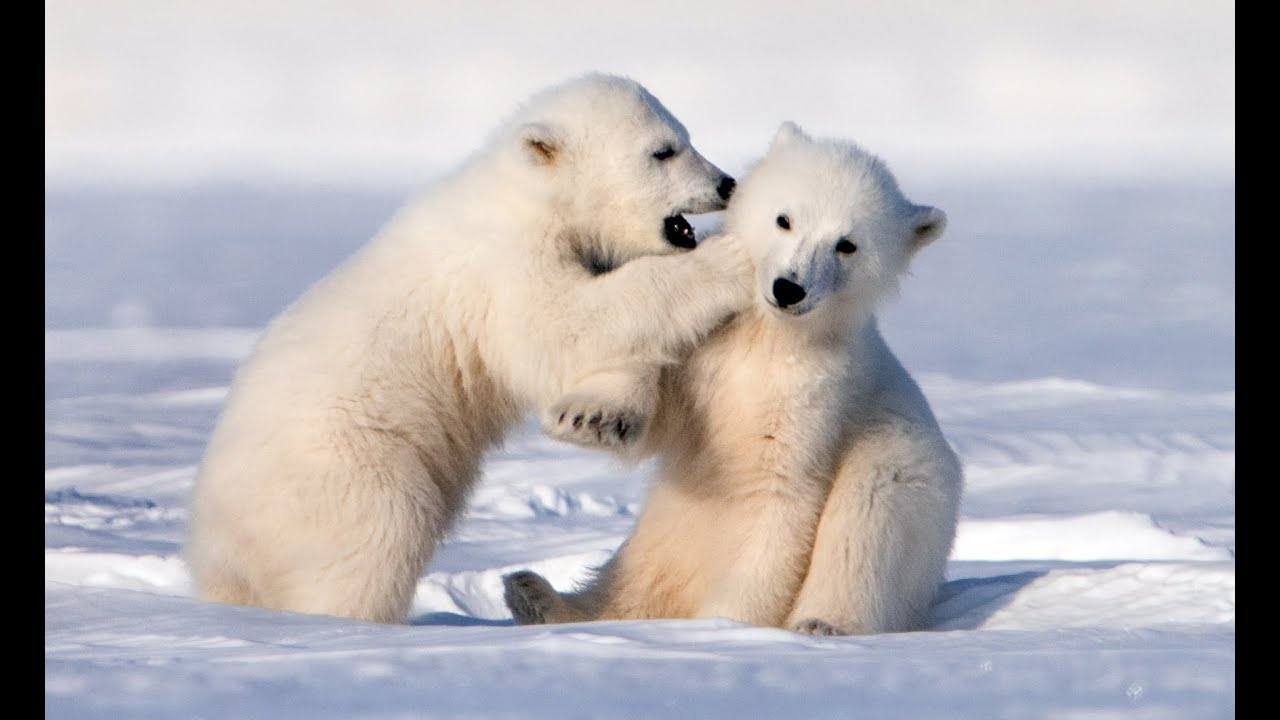

In [25]:
from IPython.display import Image
files.upload()
Image(filename='polarbears.jpg') 

In [26]:
learn_inf.predict('polarbears.jpg')

('polar', TensorImage(2), TensorImage([1.6977e-06, 2.2480e-07, 1.0000e+00]))

In [27]:
learn_inf.dls.vocab

['black', 'grizzly', 'polar']

In [28]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload



FileUpload(value={}, description='Upload')

In [31]:
#hide
# For the book, we can't actually click an upload button, so we fake it
btn_upload = SimpleNamespace(data = ['polarbears.jpg'])

In [32]:
img = PILImage.create(btn_upload.data[-1])

In [33]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [34]:
pred,pred_idx,probs = learn_inf.predict(img)

In [35]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: polar; Probability: 1.0000')

In [36]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [37]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [38]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

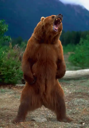

In [41]:
#hide_output
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])